# Question 9 - Twitter Dataset


In [1]:
# This block accesses your google drive
from google.colab import drive
drive.mount('/content/drive')

files = [
          '/content/drive/MyDrive/ECE219_tweet_data/tweets_#gohawks.txt',
          '/content/drive/MyDrive/ECE219_tweet_data/tweets_#gopatriots.txt',
          '/content/drive/MyDrive/ECE219_tweet_data/tweets_#nfl.txt',
          '/content/drive/MyDrive/ECE219_tweet_data/tweets_#patriots.txt',
          '/content/drive/MyDrive/ECE219_tweet_data/tweets_#sb49.txt',
          '/content/drive/MyDrive/ECE219_tweet_data/tweets_#superbowl.txt'
         ]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 9.1
Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with
1-hour bins). The tweets are stored in separate files for different hashtags and files are
named as tweet [#hashtag].txt.

In [ ]:
import json
import numpy as np

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_followers = 0
        total_retweets = 0
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        avg_tweets_per_h = total_tweets * 3600 / (max_time - min_time)
        avg_followers_per_tweet = total_followers / total_tweets
        avg_retweets_per_tweet = total_retweets / total_tweets
        print(filename)
        print('Average number of tweets per hour: ', avg_tweets_per_h)
        print('Average number of followers of users posting the tweets per tweet: ', avg_followers_per_tweet)
        print('Average number of retweets per tweet: ', avg_retweets_per_tweet)
        print('-' * 50)

for file in files:
    report_statistics(file)

/content/drive/MyDrive/ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
--------------------------------------------------
/content/drive/MyDrive/ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:  40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
--------------------------------------------------
/content/drive/MyDrive/ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
--------------------------------------------------
/content/drive/MyDrive/ECE219_tweet_data/tweets_#patriots.txt
Averag

## Question 9.2

In [ ]:
import math
import matplotlib.pyplot as plt
import datetime
import pytz
import numpy as np

pst_tz = pytz.timezone('America/Los_Angeles')

def report_tweets(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']

        total_hours = math.ceil((max_time - min_time) / 3600)
        n_tweets = [0] * total_hours
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            n_tweets[index] += 1
        return n_tweets

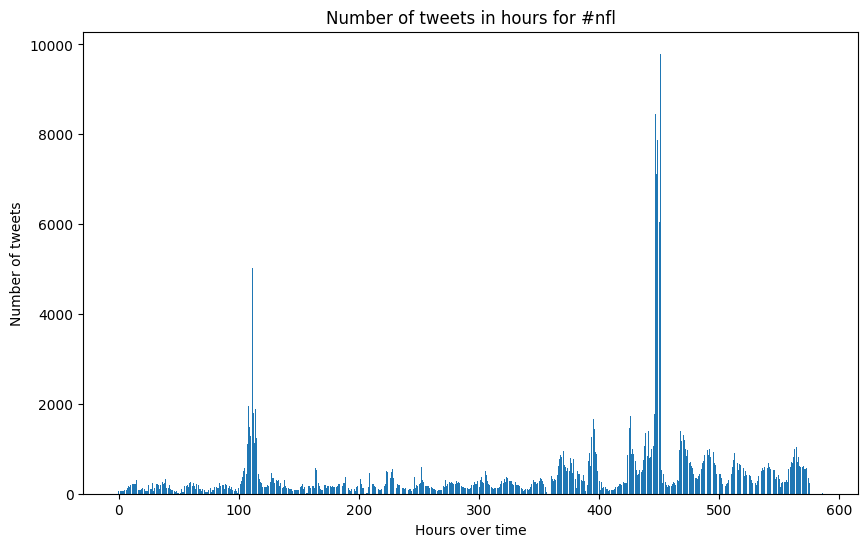

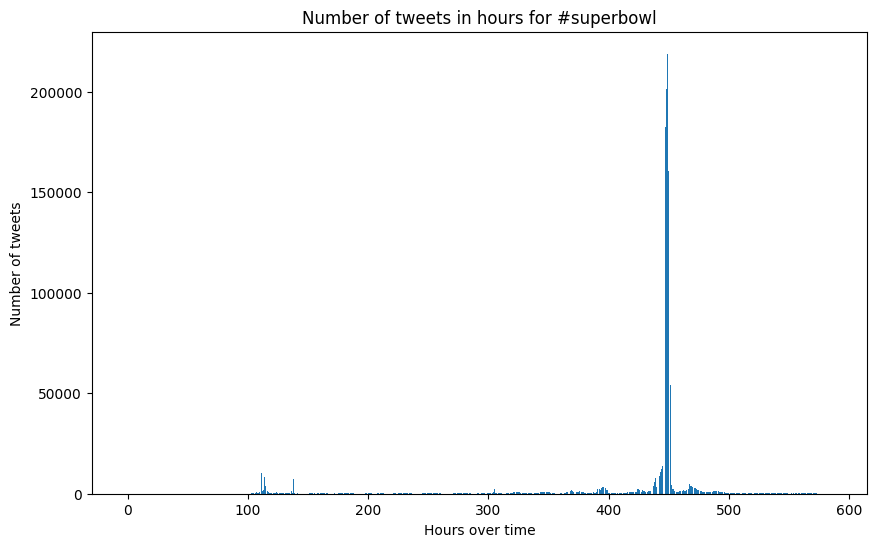

In [ ]:
q2_files = ['/content/drive/MyDrive/ECE219_tweet_data/tweets_#nfl.txt','/content/drive/MyDrive/ECE219_tweet_data/tweets_#superbowl.txt']

for file in q2_files:
    n_tweets = report_tweets(file)
    plt.figure(figsize=(10,6))
    plt.bar(range(len(n_tweets)),n_tweets)
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    cleaned_file_title1 = file.replace('/content/drive/MyDrive/ECE219_tweet_data/tweets_', '')
    cleaned_file_title2 = cleaned_file_title1.replace('.txt', '')
    plt.title('Number of tweets in hours for ' + cleaned_file_title2)

# QUESTION 10 - Define Your Own Task
Follow the steps outlined below:
Describe your task.
Explore the data and any metadata (you can even incorporate additional datasets if you choose).
Describe the feature engineering process. Implement it with reason: Why are you extracting features this way - why not in any other way?
Generate baselines for your final ML model.
A thorough evaluation is necessary.
Be creative in your task design - use things you have learned in other classes too if you are excited about them!


## Implementation 1

In [ ]:
!pip install sumy, scipy, pandas, nltk, collections, textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 18.6 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=9ca73d9ddfa248cb6be380b1c2ede0473a237f9c6630536af548573c23b3df29
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=711221d0b205147e4baa78246be3d1e79c38172daced4d65211736b1f97d7d10
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import pandas as pd
import datetime
import pytz
from collections import Counter
import re
from os.path import exists as file_exists
import nltk
import cv2

def get_data(file_path, return_day_count=False, return_hour_count=False):
    # Initialize lists to hold the tweet data
    data = {
        'retweet_count': [],
        'month': [],
        'day': [],
        'hour': [],
        'followers': [],
        'place': [],
        'title': [],
        'time': []
    }

    # Define the timezone for time conversion
    pst_tz = pytz.timezone('America/Los_Angeles')

    # Read the file and populate the lists
    with open(file_path, 'r', encoding="utf8") as f:
        for line in f:
            tweet = json.loads(line)
            timestamp = datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz)
            data['retweet_count'].append(tweet['metrics']['citations']['total'])
            data['month'].append(timestamp.month)
            data['day'].append(timestamp.day)
            data['hour'].append(timestamp.hour)
            data['followers'].append(tweet['author']['followers'])
            data['place'].append(tweet['tweet']['user']['location'])
            data['title'].append(tweet['title'])
            data['time'].append(timestamp)

    # Create a DataFrame from the collected data
    df = pd.DataFrame(data)

    # Calculate day_count and hour_count if requested
    if return_day_count or return_hour_count:
        day_count = np.array(data['month']) * 31 + np.array(data['day']) - 44
        df['day_count'] = day_count
        if return_hour_count:
            hour_count = (day_count - 1) * 24 + np.array(data['hour'])
            df['hour_count'] = hour_count

    return df

def fixed_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#FF5733', '#33FF57', '#3357FF']  # Example colors
    return colors[random_state.randint(0, len(colors)-1)]

def full_clean(tweets):
    from sklearn.feature_extraction import text
    stop_words = text.ENGLISH_STOP_WORDS
    corpus = []
    for tweet in tweets:
        clean_tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).lower().split()
        text = [word for word in clean_tweet if not word in stop_words]
        text = ' '.join(text)
        corpus.append(text)
    return corpus

def lexical_dispersion(text):
    df = get_data(text)
    tweets = df['title'].tolist()
    cleaned_tweets = full_clean(tweets)
    full_text = ' '.join(cleaned_tweets)
    cleaned_tweets = full_text.split()

    counts=Counter(cleaned_tweets)
    most_occur = counts.most_common(10)
    print(most_occur)

    plt.figure(figsize=(25,10))
    topics = ['interception', 'touchdown', 'halftime', 'controversy', 'left shark', 'commercial', 'penalty', 'comeback', 'win', 'loss']
    myText = nltk.Text(cleaned_tweets)
    myText.dispersion_plot(topics)

def wc_plot(text):
    # Check if the mask image exists
    mask_image_path = '/content/drive/MyDrive/ECE219_tweet_data/SBLogo.png'
    if not file_exists(mask_image_path):
        mask_image_path = 'SBLogo.png'
        if not file_exists(mask_image_path):
            raise FileNotFoundError("The mask image was not found.")

    # Load the corrected mask image
    logomask = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the text file exists before processing
    if not file_exists(text):
        raise FileNotFoundError(f"The file {text} was not found.")

    # Process the text file to get tweets and other data
    df = get_data(text)
    tweets = df['title'].tolist()
    cleaned_tweets = full_clean(tweets)
    full_text = ' '.join(cleaned_tweets)
    cleaned_tweets = full_text.split()

    # Generate the word cloud using the frequencies and the corrected mask
    wordcloud = WordCloud(background_color='white',
                          mask=logomask,
                          max_words=2000,
                          width=2000,
                          height=2000,
                          contour_width=5,
                          contour_color='steelblue').generate_from_frequencies(Counter(cleaned_tweets))

    # Display the word cloud
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud.recolor(color_func=fixed_color_func, random_state=3), interpolation="bilinear")
    plt.axis('off')
    plt.show()

    counts=Counter(cleaned_tweets)
    most_occur = counts.most_common(10)
    print(most_occur)

    plt.figure(figsize=(25,10))
    topics = ['interception', 'touchdown', 'halftime', 'controversy', 'left shark', 'commercial', 'penalty', 'comeback', 'win', 'loss']
    myText = nltk.Text(cleaned_tweets)
    myText.dispersion_plot(topics)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import pandas as pd
import datetime
import pytz
from collections import Counter
import re
from os.path import exists as file_exists
import nltk
import cv2

def get_data(file_path, return_day_count=False, return_hour_count=False):
    # Initialize lists to hold the tweet data
    data = {
        'retweet_count': [],
        'month': [],
        'day': [],
        'hour': [],
        'followers': [],
        'place': [],
        'title': [],
        'time': []
    }

    # Define the timezone for time conversion
    pst_tz = pytz.timezone('America/Los_Angeles')

    # Read the file and populate the lists
    with open(file_path, 'r', encoding="utf8") as f:
        for line in f:
            tweet = json.loads(line)
            timestamp = datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz)
            data['retweet_count'].append(tweet['metrics']['citations']['total'])
            data['month'].append(timestamp.month)
            data['day'].append(timestamp.day)
            data['hour'].append(timestamp.hour)
            data['followers'].append(tweet['author']['followers'])
            data['place'].append(tweet['tweet']['user']['location'])
            data['title'].append(tweet['title'])
            data['time'].append(timestamp)

    # Create a DataFrame from the collected data
    df = pd.DataFrame(data)

    # Calculate day_count and hour_count if requested
    if return_day_count or return_hour_count:
        day_count = np.array(data['month']) * 31 + np.array(data['day']) - 44
        df['day_count'] = day_count
        if return_hour_count:
            hour_count = (day_count - 1) * 24 + np.array(data['hour'])
            df['hour_count'] = hour_count

    return df

def fixed_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#FF5733', '#33FF57', '#3357FF']  # Example colors
    return colors[random_state.randint(0, len(colors)-1)]

def full_clean(tweets):
    from sklearn.feature_extraction import text
    stop_words = text.ENGLISH_STOP_WORDS
    corpus = []
    for tweet in tweets:
        clean_tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).lower().split()
        text = [word for word in clean_tweet if not word in stop_words]
        text = ' '.join(text)
        corpus.append(text)
    return corpus

def lexical_dispersion(text, cleaned_tweets, topics):
    counts=Counter(cleaned_tweets)
    most_occur = counts.most_common(10)
    print(most_occur)

    plt.figure(figsize=(25,10))
    myText = nltk.Text(cleaned_tweets)
    myText.dispersion_plot(topics)

def wc_plot(text, logomask, cleaned_tweets):
    # Generate the word cloud using the frequencies and the corrected mask
    wordcloud = WordCloud(background_color='white',
                          mask=logomask,
                          max_words=2000,
                          width=2000,
                          height=2000,
                          contour_width=5,
                          contour_color='steelblue').generate_from_frequencies(Counter(cleaned_tweets))

    # Display the word cloud
    plt.figure(figsize=(15,20))
    plt.imshow(wordcloud.recolor(color_func=fixed_color_func, random_state=3), interpolation="bilinear")
    plt.axis('off')
    plt.show()

def wc_and_ld(text):
    # Check if the text file exists before processing
    if not file_exists(text):
        raise FileNotFoundError(f"The file {text} was not found.")

    # Check if the mask image exists
    mask_image_path = '/content/drive/MyDrive/ECE219_tweet_data/SBLogo.png'
    if not file_exists(mask_image_path):
        raise FileNotFoundError("The mask image was not found.")

    # Load the corrected mask image
    logomask = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

    # Process the text file to get tweets and other data
    df = get_data(text)
    tweets = df['title'].tolist()
    cleaned_tweets = full_clean(tweets)
    full_text = ' '.join(cleaned_tweets)
    cleaned_tweets = full_text.split()

    topics = ['interception', 'touchdown', 'halftime', 'controversy', 'left shark', 'penalty', 'comeback', 'win', 'loss']

    wc_plot(text, logomask, cleaned_tweets)
    lexical_dispersion(text, cleaned_tweets, topics)

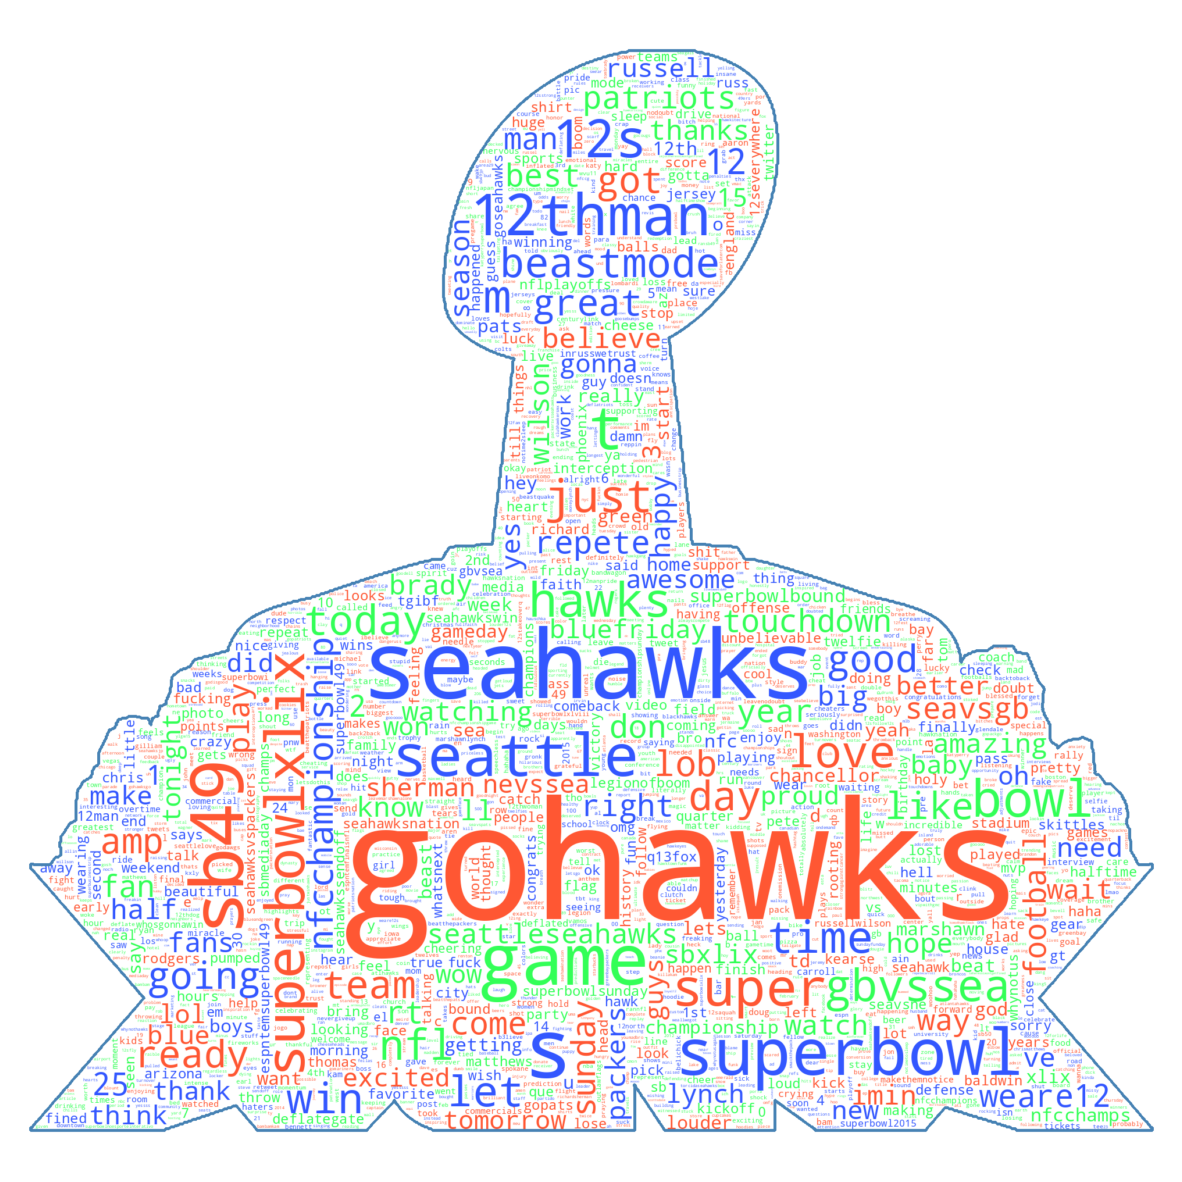

[('gohawks', 171263), ('seahawks', 27006), ('s', 20035), ('sb49', 15935), ('game', 15011), ('superbowl', 12111), ('t', 10330), ('seattle', 9937), ('12thman', 9485), ('superbowlxlix', 8524)]


<Figure size 2500x1000 with 0 Axes>

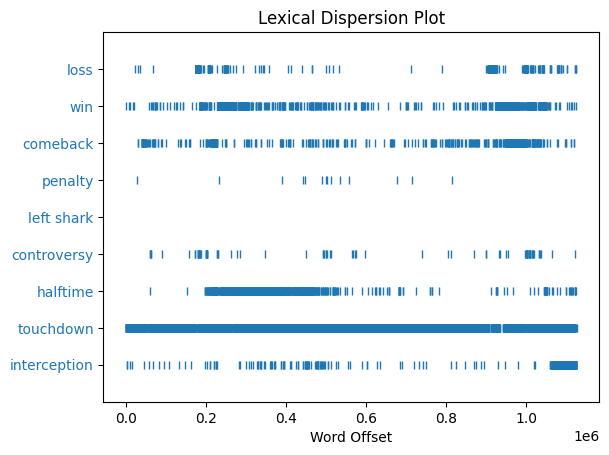

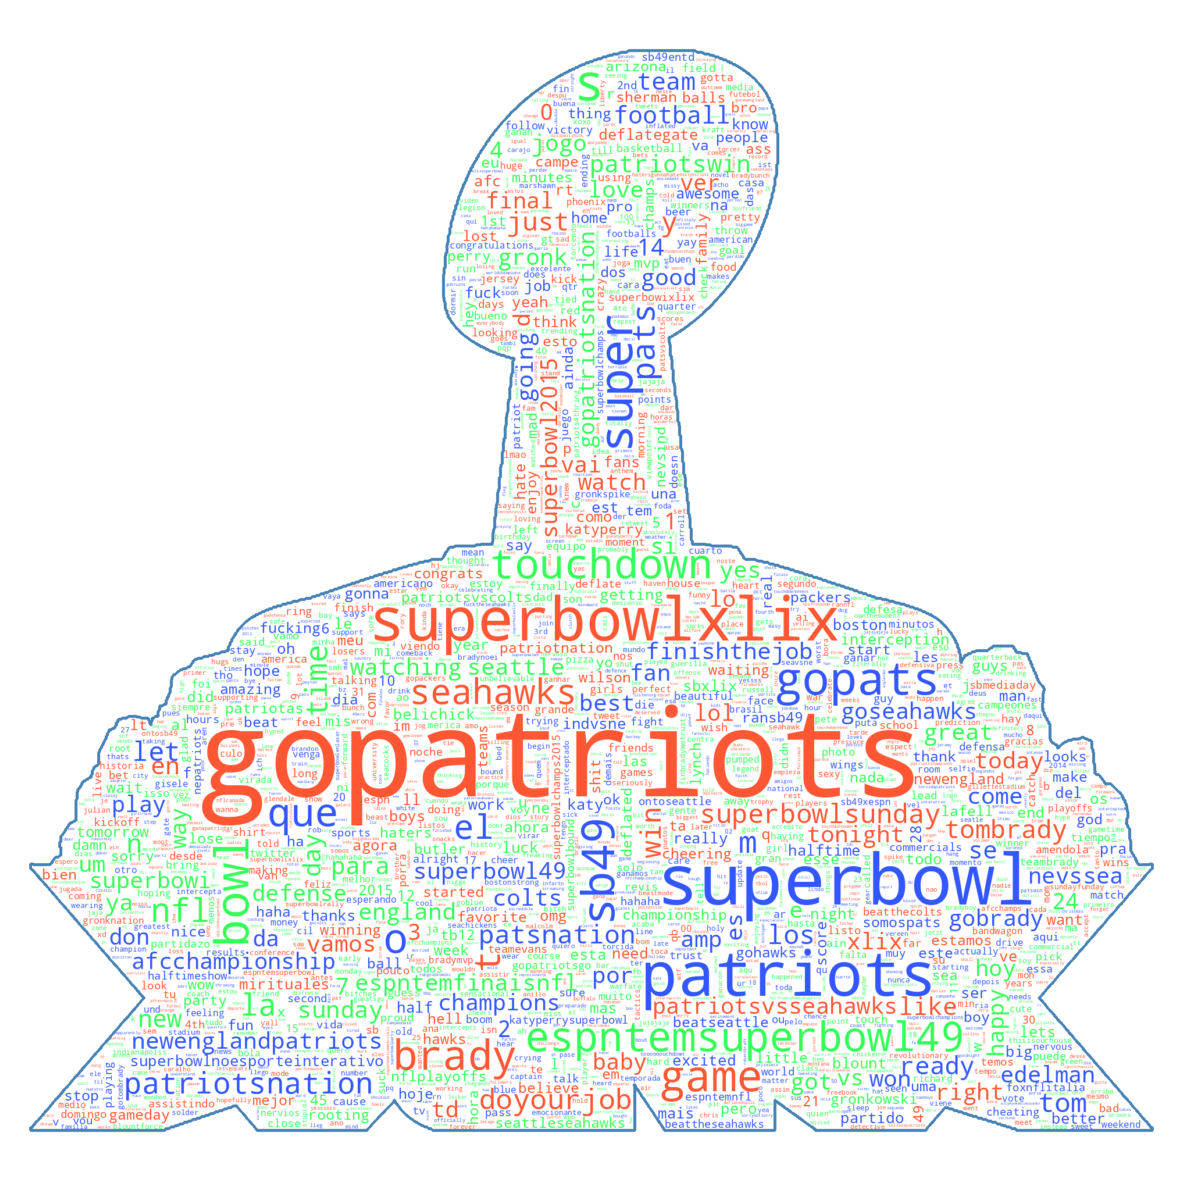

[('gopatriots', 23581), ('superbowl', 3685), ('patriots', 2769), ('superbowlxlix', 2662), ('s', 1789), ('super', 1543), ('bowl', 1512), ('gopats', 1463), ('sb49', 1423), ('game', 1283)]


<Figure size 2500x1000 with 0 Axes>

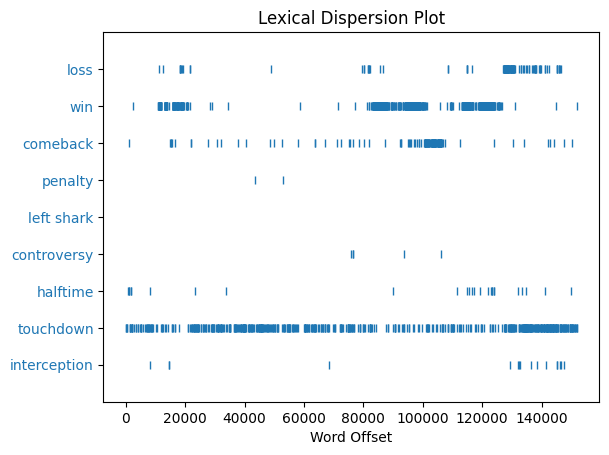

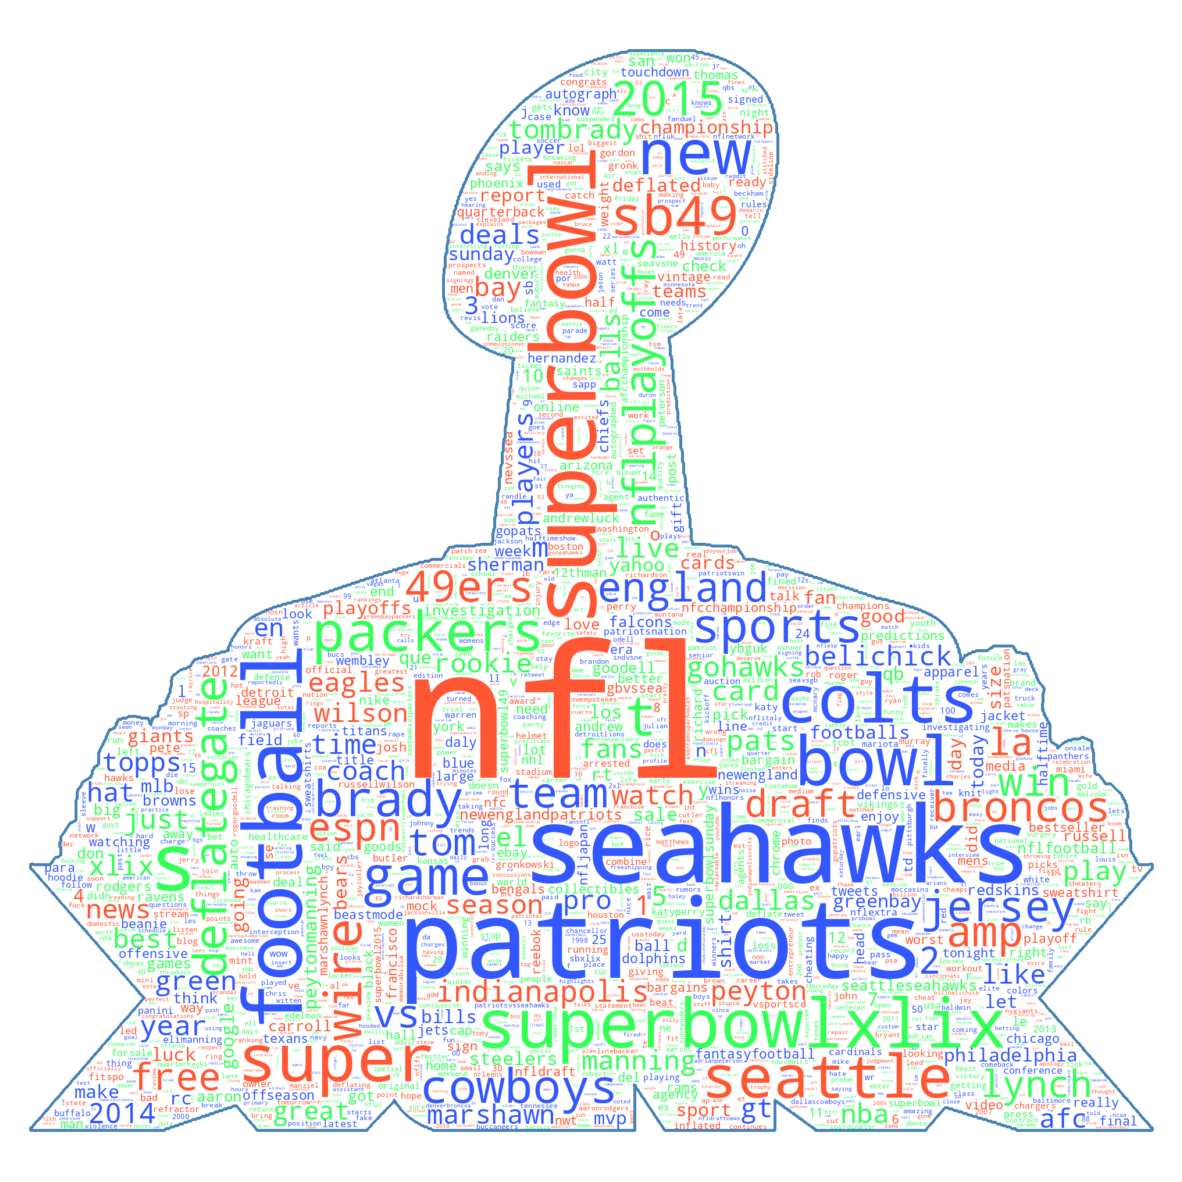

[('nfl', 262661), ('patriots', 50814), ('seahawks', 47533), ('superbowl', 32519), ('s', 26734), ('football', 26250), ('superbowlxlix', 18109), ('bowl', 18093), ('colts', 17668), ('super', 16963)]


<Figure size 2500x1000 with 0 Axes>

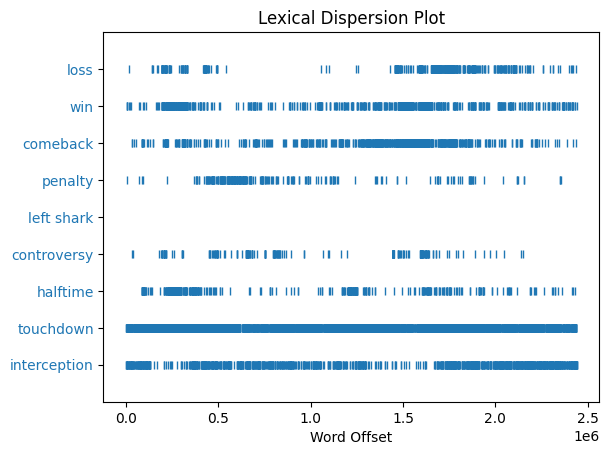

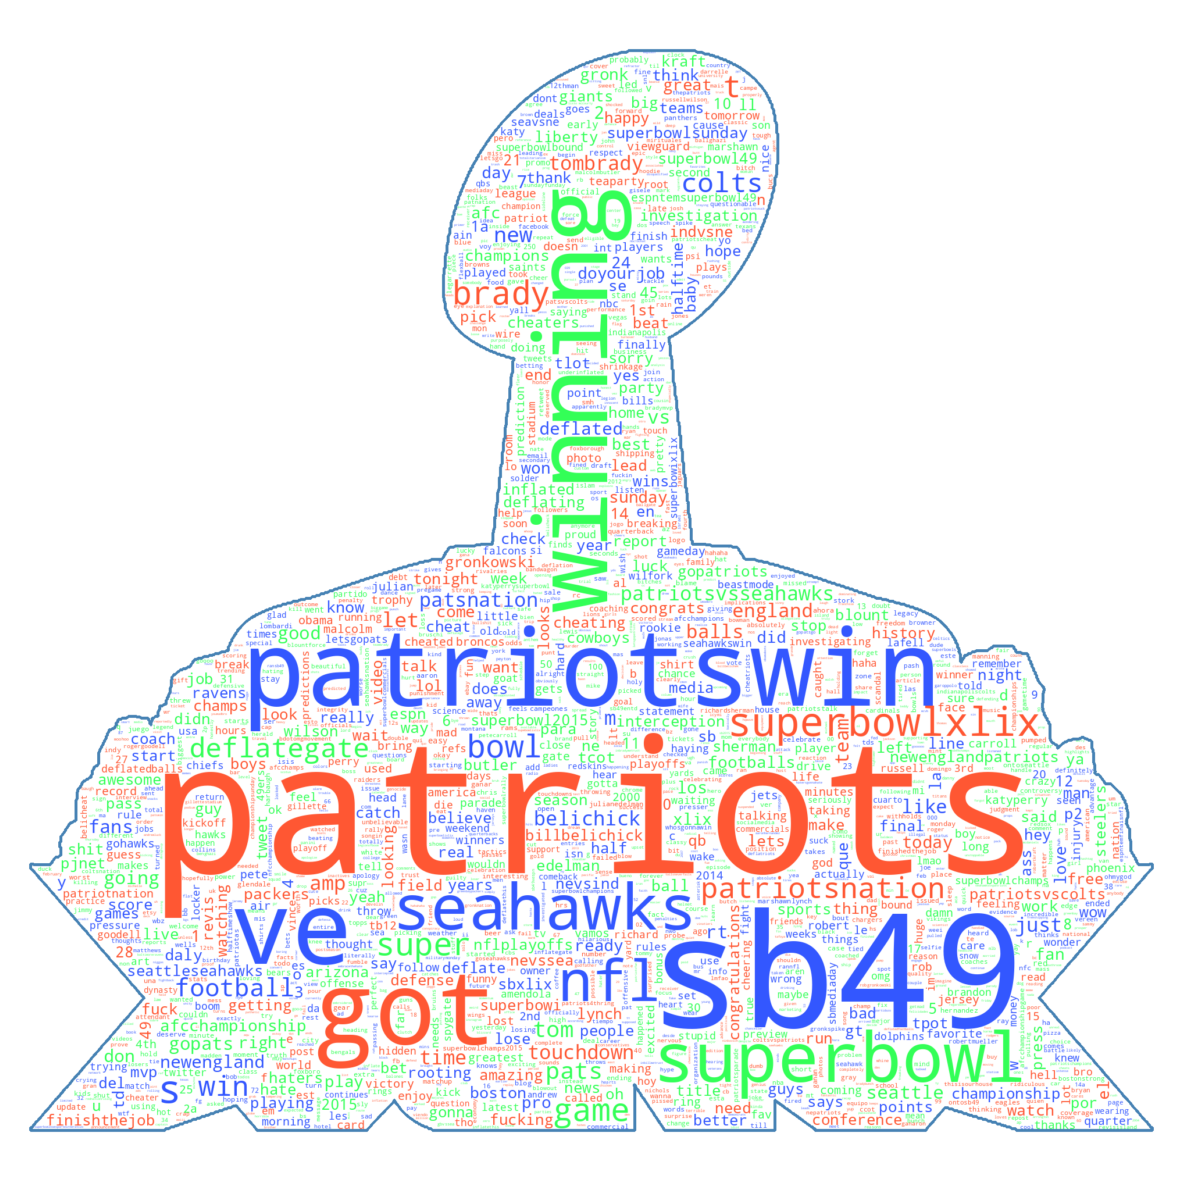

[('patriots', 267968), ('sb49', 187849), ('patriotswin', 179573), ('got', 168507), ('winning', 166352), ('ve', 166261), ('superbowl', 60223), ('seahawks', 50220), ('nfl', 39638), ('superbowlxlix', 32671)]


<Figure size 2500x1000 with 0 Axes>

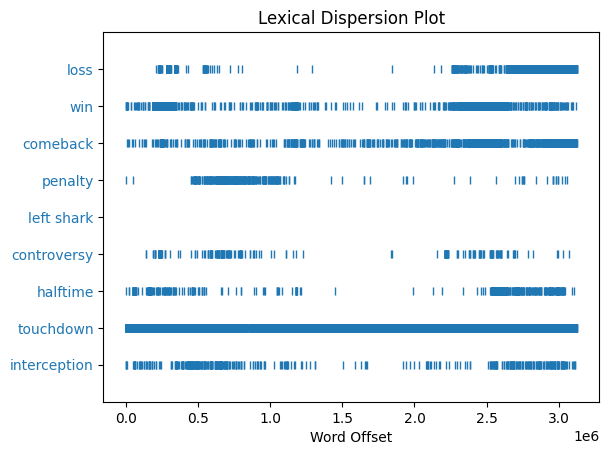

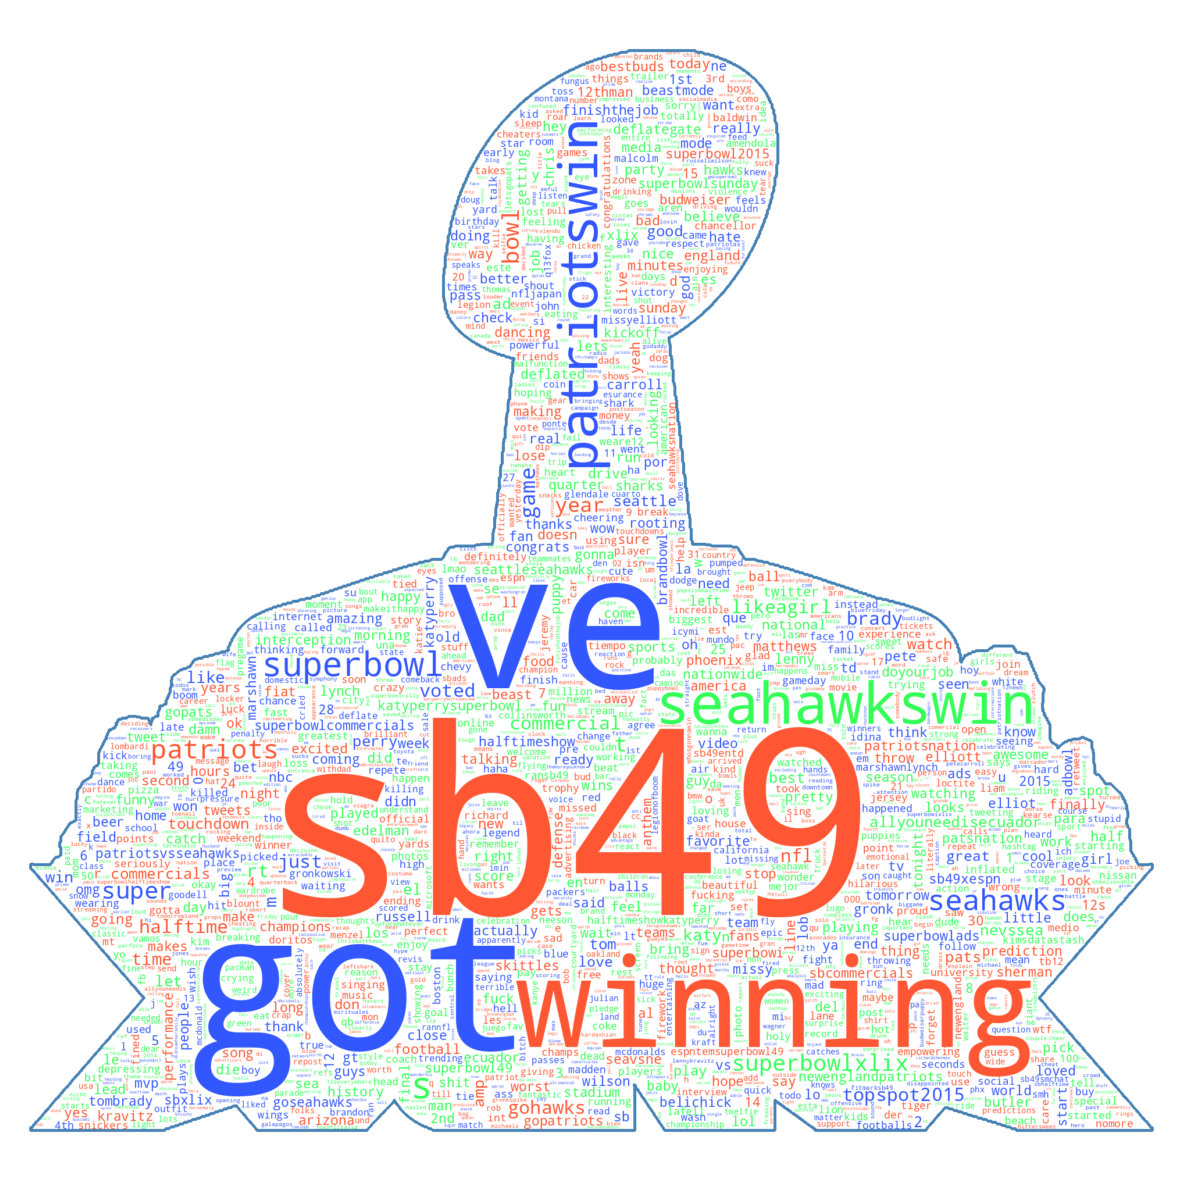

[('sb49', 742175), ('got', 367153), ('ve', 364663), ('winning', 363160), ('seahawkswin', 195618), ('patriotswin', 167265), ('s', 62372), ('superbowl', 51845), ('seahawks', 37744), ('patriots', 31837)]


<Figure size 2500x1000 with 0 Axes>

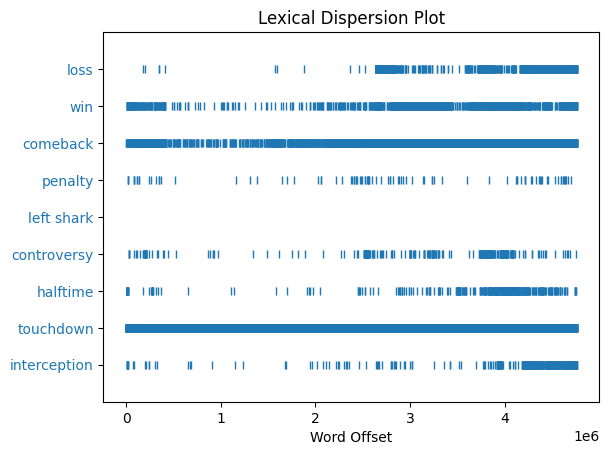

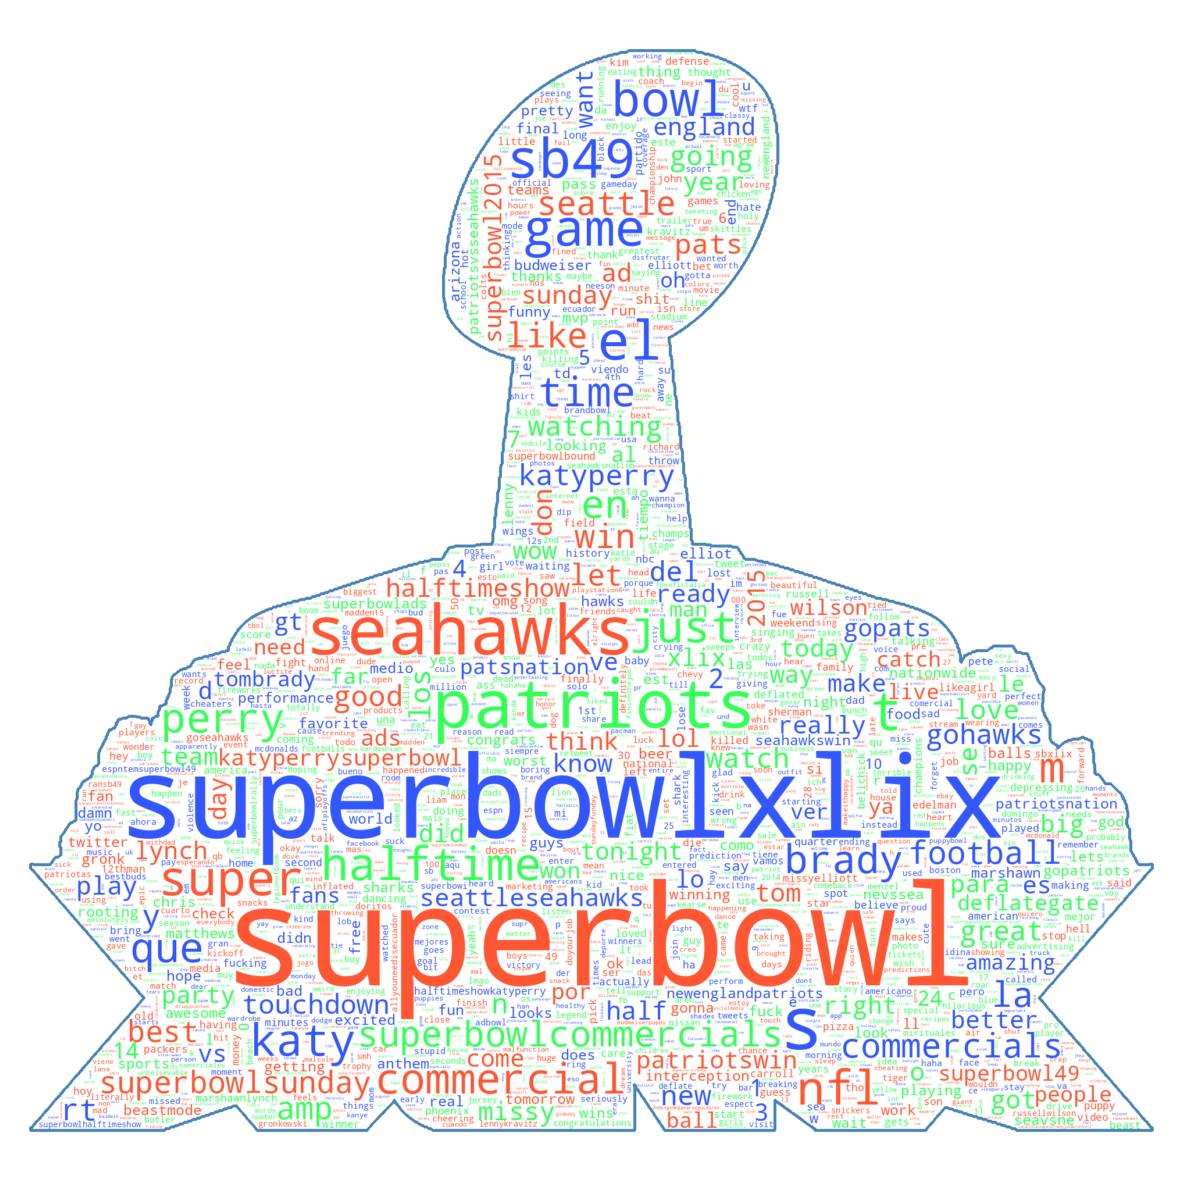

[('superbowl', 749704), ('superbowlxlix', 468806), ('s', 144426), ('seahawks', 121821), ('patriots', 116917), ('sb49', 70440), ('t', 69898), ('el', 69745), ('game', 61952), ('super', 56730)]


<Figure size 2500x1000 with 0 Axes>

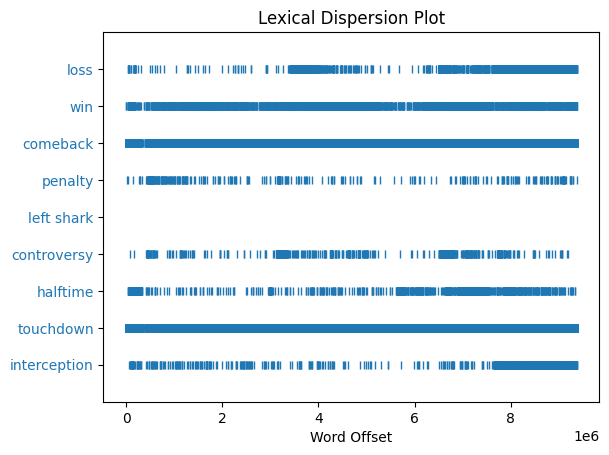

In [ ]:
for hashtag in files:
  wc_and_ld(hashtag)

### Prediction of retweet number

This cell should take 7 minutes to parse the data

In [29]:
import time
import matplotlib.pyplot as plt
import pytz

def generate_df(pddata_raw):
    df = pd.DataFrame([],columns=['time unit','tweets','retweets','followers sum','followers max','hr_min'])
    col = pddata_raw.columns.get_loc('time')
    df['time unit'] = range(int(pddata_raw.iloc[len(pddata_raw.index)-1,col] - pddata_raw.iloc[0,col]+1))
    df['tweets'] = pddata_raw.groupby("time")['tweets'].sum()
    df['retweets'] = pddata_raw.groupby("time")['retweets'].sum()
    df['followers sum'] = pddata_raw.groupby("time")['followers'].sum()
    df['followers max'] = pddata_raw.groupby("time")["followers"].max()
    df['hr_min'] = pddata_raw.groupby("time")['hr_min'].mean()
    df = df.fillna(0).reset_index(drop=True)

    return df

FEBRUARY_START_HOUR_IDX = ((2 - 1) * 31 + 1 - 14) * 24 + 8
FEBRUARY_END_HOUR_IDX = ((2 - 1) * 31 + 1 - 14) * 24 + 20

def process_file(file):
    print(f'Parsing file {file}...')
    with open(file, 'r', encoding="utf-8") as f:
        return [parse_line(json.loads(line)) for line in f]

def parse_line(line_data):
    citation_date = line_data['citation_date']
    tweet_count = 1
    retweet_count = line_data['metrics']['citations']['total']
    follower_count = line_data['author']['followers']
    return [citation_date, tweet_count, retweet_count, follower_count, 1]  # Last element is a placeholder for hr_min

def parse(files):
    data_raw = [process_file(file) for file in files]
    pddata_raw = transfer_time(data_raw[0], 'hour')
    pddata_raw['time'] -= pddata_raw.loc[0, 'time']

    df = generate_df(pddata_raw)
    df_y = df.iloc[1:, 2].reset_index(drop=True)
    df = df.iloc[:len(df_y)]

    return df.iloc[:, 1:], df_y

def accumulate_hours(p):
    return ((p.month - 1) * 31 + p.day) * 24 + p.hour

def accumulate_minutes(p):
    return ((((p.month - 1) * 31 + p.day) * 24 + p.hour) * 60 + p.minute) // 5

def convert_time(row, pst_tz, time_type):
    p = datetime.datetime.fromtimestamp(row['time'], pst_tz)
    if time_type == 'hour':
        return accumulate_hours(p), p.hour
    elif time_type == 'minute':
        return accumulate_minutes(p), p.minute // 5

def transfer_time(data_raw, time_type):
    # Define the timezone for PST
    pst_tz = pytz.timezone('America/Los_Angeles')

    # Create a DataFrame and sort by time
    pddata_raw = pd.DataFrame(data_raw, columns=['time', 'tweets', 'retweets', 'followers', 'hr_min'])
    pddata_raw.sort_values(by='time', inplace=True)
    pddata_raw.reset_index(drop=True, inplace=True)

    # Check if the time_type is valid
    if time_type not in ['hour', 'minute']:
        print("Invalid time type")
        return

    # Apply time conversion
    pddata_raw[['time', 'hr_min']] = pddata_raw.apply(lambda row: convert_time(row, pst_tz, time_type), axis=1, result_type='expand')

    return pddata_raw

def retweet_plot(df_y, pred_y):
    plt.figure(figsize=(10, 8))
    area = np.pi * (12)
    plt.scatter(df_y, pred_y, s=area, c="#006400", alpha=0.5)
    plt.plot([df_y.min(), df_y.max()], [df_y.min(), df_y.max()], 'k--', lw=2)
    plt.xlabel('True Values', fontsize=14)
    plt.ylabel('Fitted Values', fontsize=14)
    plt.title('True vs Fitted Values', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.show()

In [ ]:
df,df_y = parse(files)

In [7]:
from sklearn.model_selection import KFold

param_grid = {
    'max_depth': [10, 50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [2, 10],
    'n_estimators': [100, 400]
}
kf = KFold(n_splits=3, random_state=42, shuffle=True)

1 minute

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from joblib import Parallel, delayed
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define the shape of the parameter grid
shape = (len(param_grid['max_depth']), len(param_grid['max_features']), len(param_grid['min_samples_leaf']), len(param_grid['min_samples_split']), len(param_grid['n_estimators']))

# Initialize the RMSE arrays
avg_RMSE1_train = np.zeros(shape)
avg_RMSE1_test = np.zeros(shape)

def train_and_evaluate(n1, n2, n3, n4, n5, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators, kf, df, df_y):
    MSE_train = []
    MSE_test = []
    total_train = 0
    total_test = 0
    for train_index, test_index in kf.split(df):
        X_train = df.iloc[train_index]
        y_train = df_y.iloc[train_index]
        X_test = df.iloc[test_index]
        y_test = df_y.iloc[test_index]
        reg = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, max_features=max_features, random_state=42)
        reg.fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        MSE_train.append(mean_squared_error(y_train, pred_train) * len(train_index))
        MSE_test.append(mean_squared_error(y_test, pred_test) * len(test_index))
        total_train += len(train_index)
        total_test += len(test_index)

    avg_RMSE_train = np.sqrt(sum(MSE_train) / total_train)
    avg_RMSE_test = np.sqrt(sum(MSE_test) / total_test)
    return (n1, n2, n3, n4, n5, avg_RMSE_train, avg_RMSE_test)

# Prepare the parameters for parallel execution
tasks = [(n1, n2, n3, n4, n5, max_depth, max_features, min_samples_leaf, min_samples_split, n_estimators, kf, df, df_y)
         for n1, max_depth in enumerate(param_grid['max_depth'])
         for n2, max_features in enumerate(param_grid['max_features'])
         for n3, min_samples_leaf in enumerate(param_grid['min_samples_leaf'])
         for n4, min_samples_split in enumerate(param_grid['min_samples_split'])
         for n5, n_estimators in enumerate(param_grid['n_estimators'])]

# Execute in parallel
results = Parallel(n_jobs=-1)(delayed(train_and_evaluate)(*task) for task in tasks)

# Process results
for res in results:
    n1, n2, n3, n4, n5, train_rmse, test_rmse = res
    avg_RMSE1_train[n1, n2, n3, n4, n5] = train_rmse
    avg_RMSE1_test[n1, n2, n3, n4, n5] = test_rmse
    print(f"Parameters: Depth={param_grid['max_depth'][n1]}, Features={param_grid['max_features'][n2]}, Leaf={param_grid['min_samples_leaf'][n3]}, Split={param_grid['min_samples_split'][n4]}, Estimators={param_grid['n_estimators'][n5]}")
    print(f"RMSE Train={train_rmse}, RMSE Test={test_rmse}\n")


Parameters: Depth=10, Features=auto, Leaf=1, Split=2, Estimators=100
RMSE Train=32.21915452725377, RMSE Test=65425.3988191993

Parameters: Depth=10, Features=auto, Leaf=1, Split=2, Estimators=400
RMSE Train=0.00364584953255648, RMSE Test=65426.846720711335

Parameters: Depth=10, Features=auto, Leaf=1, Split=10, Estimators=100
RMSE Train=280.4516764488159, RMSE Test=58602.4553845876

Parameters: Depth=10, Features=auto, Leaf=1, Split=10, Estimators=400
RMSE Train=1.72212220651101, RMSE Test=58606.11142025295

Parameters: Depth=10, Features=auto, Leaf=4, Split=2, Estimators=100
RMSE Train=15722.712250812985, RMSE Test=59353.09619510094

Parameters: Depth=10, Features=auto, Leaf=4, Split=2, Estimators=400
RMSE Train=2901.954612970132, RMSE Test=63084.6264989581

Parameters: Depth=10, Features=auto, Leaf=4, Split=10, Estimators=100
RMSE Train=15657.619640920027, RMSE Test=55716.51095560369

Parameters: Depth=10, Features=auto, Leaf=4, Split=10, Estimators=400
RMSE Train=3037.594743737187, 

In [25]:
print("min RMSE in testset=",np.min(avg_RMSE1_test))
print("parameters:")
n1,n2,n3,n4,n5= np.unravel_index(np.argmin(avg_RMSE1_test), avg_RMSE1_test.shape)
print("max_depth=",param_grid["max_depth"][n1],"max_features=",param_grid["max_features"][n2],"min_samples_leaf=",param_grid["min_samples_leaf"][n3],"min_samples_split=",param_grid["min_samples_split"][n4],"n_estimators=",param_grid["n_estimators"][n5])
print("")

min RMSE in testset= 53851.448443186455
parameters:
max_depth= 10 max_features= sqrt min_samples_leaf= 4 min_samples_split= 2 n_estimators= 100



In [26]:
df_test1, df_y_test1 = parse([files[2]])

Parsing file /content/drive/MyDrive/ECE219_tweet_data/tweets_#nfl.txt...


In [27]:
#reg = GradientBoostingRegressor(n_estimators=param_grid["n_estimators"][n5],max_depth=param_grid["max_depth"][n1],min_samples_leaf=param_grid["min_samples_leaf"][n3],min_samples_split=param_grid["min_samples_split"][n4], max_features=param_grid["max_features"][n2],random_state=42)
reg = GradientBoostingRegressor(n_estimators=10,max_depth=50,min_samples_leaf=2,min_samples_split=2, max_features='auto',random_state=42)

reg.fit(df,df_y)
pred = reg.predict(df)
pred1=reg.predict(df_test1)

print("train_MSE=",mean_squared_error(df_y, pred))
print("test_MSE=",mean_squared_error(df_y_test1, pred1)*len(pred1)/15)

train_MSE= 758978450.1592393
test_MSE= 565809203.3566786


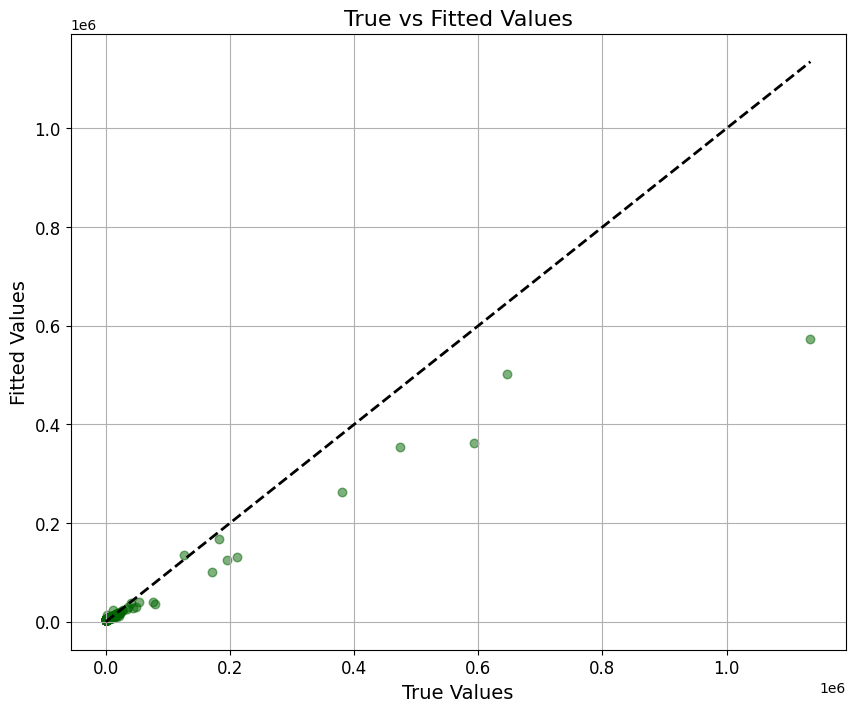

In [30]:
retweet_plot(df_y, pred)

24 minutes

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def train_model(X_train, y_train, X_test, y_test, hidden_layers):
    model = MLPRegressor(hidden_layer_sizes=hidden_layers,
                         activation='relu',
                         solver='adam',
                         alpha=1e-5,
                         random_state=42)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    return mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test)

def calculate_rmse(MSE_values, total_samples):
    return np.sqrt(sum(MSE_values) / total_samples)

def model_selection(hidden_units, kf, df, df_y):
    avg_RMSE_train = np.zeros((len(hidden_units),) * 3)
    avg_RMSE_test = np.zeros((len(hidden_units),) * 3)

    for i, unit_i in enumerate(hidden_units):
        for j, unit_j in enumerate(hidden_units):
            for k, unit_k in enumerate(hidden_units):
                MSE_train, MSE_test = [], []
                total_train, total_test = 0, 0

                for train_index, test_index in kf.split(df):
                    X_train, y_train = df.iloc[train_index], df_y.iloc[train_index]
                    X_test, y_test = df.iloc[test_index], df_y.iloc[test_index]
                    mse_train, mse_test = train_model(X_train, y_train, X_test, y_test, (unit_i, unit_j, unit_k))
                    MSE_train.append(mse_train * len(train_index))
                    MSE_test.append(mse_test * len(test_index))
                    total_train += len(train_index)
                    total_test += len(test_index)

                avg_RMSE_train[i, j, k] = calculate_rmse(MSE_train, total_train)
                avg_RMSE_test[i, j, k] = calculate_rmse(MSE_test, total_test)

                print(f"Layer sizes: {unit_i}, {unit_j}, {unit_k}")
                print(f"RMSE_train: {avg_RMSE_train[i, j, k]}, RMSE_test: {avg_RMSE_test[i, j, k]}\n")

    return avg_RMSE_train, avg_RMSE_test

hidden_units = [50, 100, 200, 300, 500, 600]
avg_RMSE_train, avg_RMSE_test = model_selection(hidden_units, kf, df, df_y)


units1= 50 units2= 50 units3= 50
RMSE_train= 841294.7976687113 RMSE_test= 928041.9899966285

units1= 50 units2= 50 units3= 100
RMSE_train= 233453.98552943184 RMSE_test= 283080.8628352254

units1= 50 units2= 50 units3= 200
RMSE_train= 356805.46393905795 RMSE_test= 264029.7275262446

units1= 50 units2= 50 units3= 300
RMSE_train= 799403.1896019778 RMSE_test= 703658.0087411376

units1= 50 units2= 50 units3= 500
RMSE_train= 46145.19368972973 RMSE_test= 46034.15926547309

units1= 50 units2= 50 units3= 600
RMSE_train= 186718.20996814346 RMSE_test= 217584.69265355193

units1= 50 units2= 100 units3= 50
RMSE_train= 603985.4338634589 RMSE_test= 716377.614119865

units1= 50 units2= 100 units3= 100
RMSE_train= 178071.71544983782 RMSE_test= 160249.08102036614

units1= 50 units2= 100 units3= 200
RMSE_train= 89431.07319857285 RMSE_test= 110035.94913681832

units1= 50 units2= 100 units3= 300
RMSE_train= 47043.37899729859 RMSE_test= 53217.547946603154

units1= 50 units2= 100 units3= 500
RMSE_train= 2004

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


units1= 50 units2= 300 units3= 500
RMSE_train= 57921.003321070086 RMSE_test= 43174.209719079234

units1= 50 units2= 300 units3= 600
RMSE_train= 435689.8516697697 RMSE_test= 546068.8972980942

units1= 50 units2= 500 units3= 50
RMSE_train= 40720.341747586746 RMSE_test= 65073.856174997025

units1= 50 units2= 500 units3= 100
RMSE_train= 904395.1654698101 RMSE_test= 555295.647136105

units1= 50 units2= 500 units3= 200
RMSE_train= 264975.8952839859 RMSE_test= 312756.40150242654

units1= 50 units2= 500 units3= 300
RMSE_train= 1837341.7697750204 RMSE_test= 2071635.0502639445

units1= 50 units2= 500 units3= 500
RMSE_train= 800870.2106095866 RMSE_test= 929093.9773354997

units1= 50 units2= 500 units3= 600
RMSE_train= 66478.98184992418 RMSE_test= 58208.866320531095

units1= 50 units2= 600 units3= 50
RMSE_train= 369252.0388274005 RMSE_test= 406786.47466544935

units1= 50 units2= 600 units3= 100
RMSE_train= 132126.2059061736 RMSE_test= 153473.81087988045

units1= 50 units2= 600 units3= 200
RMSE_tra

In [17]:
# print("min RMSE in testset=",np.min(avg_RMSE2_test))
# n1,n2,n3= np.unravel_index(np.argmin(avg_RMSE2_test), avg_RMSE2_test.shape)
# print("hidden layer sizes=",hidden_units[n1],hidden_units[n2],hidden_units[n3])

min RMSE in testset= 37293.82491504081
hidden layer sizes= 500 50 300


In [18]:
reg = MLPRegressor(hidden_layer_sizes=(500,500,500,),activation='relu', solver='adam', alpha=1e-5, random_state=42)
reg.fit(df,df_y)
pred = reg.predict(df)
pred1=reg.predict(df_test1)

print("train_MSE=",mean_squared_error(df_y, pred))
print("test_MSE=",mean_squared_error(df_y_test1, pred1)*len(pred1)/15)

train_MSE= 1938963562.5349667
test_MSE= 153632405.97472566


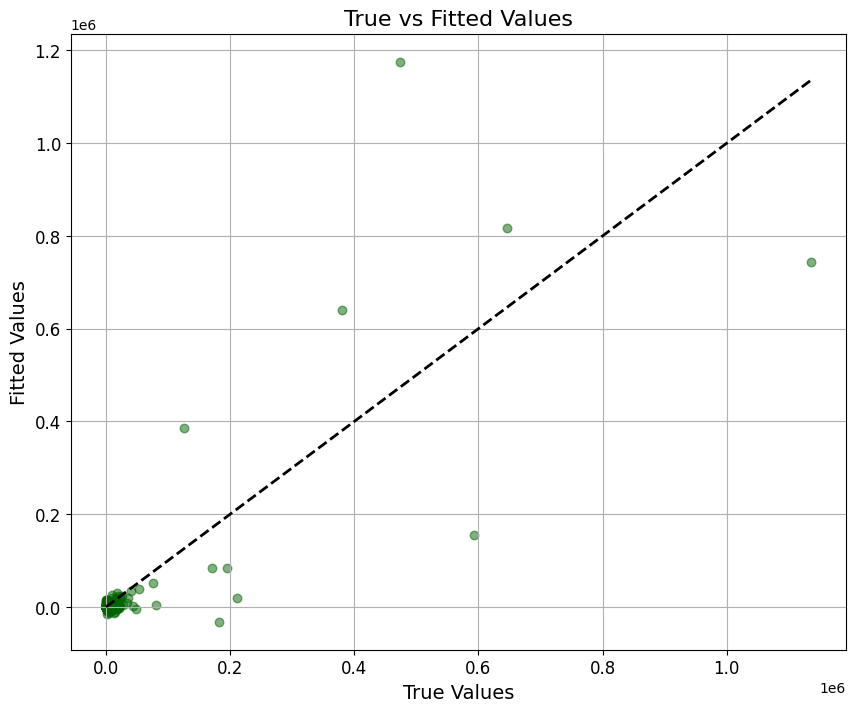

In [23]:
retweet_plot(df_y, pred)